In [3]:
#CHANGE 1

import os
import pandas as pd

# Replace 'path_to_folder' with the actual path to your folder containing CSV files
cwd = os.getcwd() #Get the current working directory (CWD) 
path_to_folder = cwd

#print(path_to_folder)



In [11]:
# List all the files in the folder
file_list = os.listdir(path_to_folder)

# Filter out only the CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Create an empty dictionary to store dataframes
dataframes = {}

# Read CSV files and store them in dataframes
for csv_file in csv_files:
    file_path = os.path.join(path_to_folder, csv_file)
    df_name = os.path.splitext(csv_file)[0]  # Use file name as the dataframe name
    dataframes[df_name] = pd.read_csv(file_path)

# Now dataframes dictionary contains all your dataframes
# You can access them using keys (which are the CSV file names without the extension)
for df_name, df in dataframes.items():
    print(f"Dataframe '{df_name}':")
    second_column = df.iloc[:, 1]
    unique_values = second_column.unique()  # Get unique values
    value_counts = second_column.value_counts() # Get unique values and their counts
    print((value_counts))
    #print(df.columns)
    print("=" * 30)

Dataframe '12-8-2023_s030l0683-1_SW267':
F414      28894
F600         10
pdf           8
F247M         5
F212          4
ADHOC         3
LETTER        1
Fact          1
Name: F414, dtype: int64
Dataframe '11-8-2023_s030l0683-1_SW267':
F414      28794
ADHOC        44
pdf          38
F247M        18
F300M        16
F600         15
LETTER       11
F212          9
F214M         8
Fact          1
Name: F414, dtype: int64
Dataframe '10-8-2023_s030l0683-3_SW267':
F414      28916
ADHOC        34
pdf          25
F247M        17
F300M        14
F600         14
F212          9
LETTER        6
F214M         1
Name: F414, dtype: int64
Dataframe '14-8-2023_s030l0683-1_SW267':
F414      14764
ADHOC        33
F300M        14
pdf          12
F247M         9
LETTER        8
F600          8
F212          4
F214M         3
Name: F414, dtype: int64
Dataframe '13-8-2023_s030l0683-3_SW267':
F414                     24903
Inbound communication       90
F300M                        8
F600                      

In [14]:
final_dict={}
for df_name, df in dataframes.items():
    #print(f"Dataframe '{df_name}':")
    second_column = df.iloc[:, 1]
    #unique_values = second_column.unique()  # Get unique values
    value_counts = second_column.value_counts() # Get unique values and their counts
    
    # Access unique values and their counts individually
    for value, count in value_counts.items():
        final_dict[value]=final_dict.get(value,0)+count #Accumulate over all the dataframes(CSVs)
        
    #print((value_counts))
    #print(df.columns)
    #print("=" * 30)
    
print(final_dict)

{'F414': 314419, 'F600': 118, 'pdf': 303, 'F247M': 130, 'F212': 103, 'ADHOC': 332, 'LETTER': 73, 'Fact': 5, 'F300M': 161, 'F214M': 36, 'Inbound communication': 178, 'F245M': 2, 'Feb.': 1}


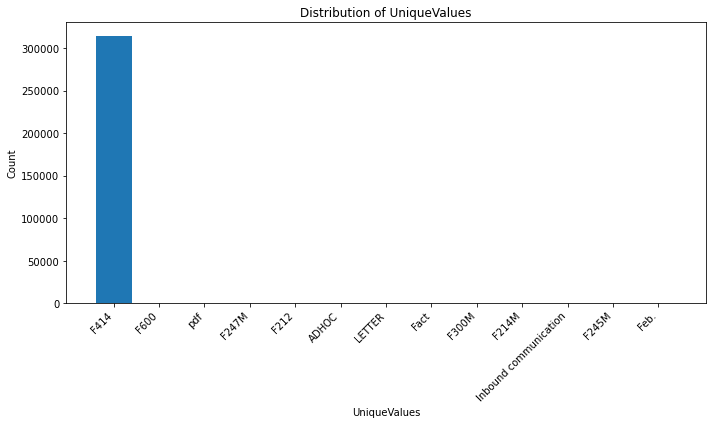

In [18]:
#Bar Plot

import matplotlib.pyplot as plt

# Extract keys and values from the dictionary
keys = list(final_dict.keys())
values = list(final_dict.values())

# Create a bar plot
plt.bar(keys, values)

# Add labels and title
plt.xlabel('UniqueValues')
plt.ylabel('Count')
plt.title('Distribution of UniqueValues')

#Making it more readable

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Stretch the plot horizontally
plt.gcf().set_size_inches(10, 6)  # Adjust the width and height as needed

# Show the plot
plt.tight_layout()  # Ensures proper spacing of labels
plt.show()



In [21]:
#Creating the CSV file for the final_dict 

import csv
# Specify the filename for the CSV file
csv_filename = 'UniqueValuesAndCounts.csv'

# Open the CSV file in write mode
with open(csv_filename, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the header
    csv_writer.writerow(['UniqueValues', 'Counts'])

    # Write data rows from the dictionary
    for key, value in final_dict.items():
        csv_writer.writerow([key, value])

In [ ]:
#Namaste#